# Binary Classification  

### 영화 리뷰 텍스트를 긍정과 부정으로 분류하기

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [ ]:
# 1-1. Define Data: Load IMDB dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
"["+", ".join(map(str, train_data[0]))+"]"

'[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]'

In [4]:
train_labels[0]

1

In [5]:
max( [max(seq) for seq in train_data])  # 단어의 인덱스 : 0 ~ 9999 = 10000개

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(val, key) for key, val in word_index.items()]
)
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# 1-2. Define Data: list to tensor

In [8]:
import numpy as np

def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# label to tensor

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train[0]

1.0

In [12]:
# 1-3. Define Data: split to train and validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# 2. Model
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
# 3. Compile
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
# 4. Train Model
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.6235 - accuracy: 0.6689 - val_loss: 0.4070 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3418 - accuracy: 0.9030 - val_loss: 0.3394 - val_accuracy: 0.8623
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2416 - accuracy: 0.9236 - val_loss: 0.2821 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1752 - accuracy: 0.9516 - val_loss: 0.3002 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1437 - accuracy: 0.9583 - val_loss: 0.2862 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1137 - accuracy: 0.9693 - val_loss: 0.2929 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0955 - accuracy: 0.9730 - val_loss: 0.3097 - val_accuracy: 0.8841
Epoch 8/20
30

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# 5. Loss and Accuracy Graph

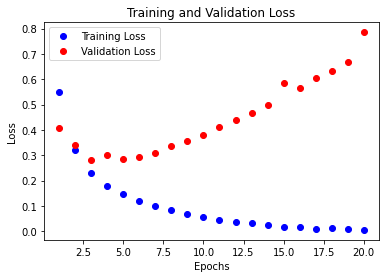

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'ro', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
plt.clf()

<Figure size 432x288 with 0 Axes>

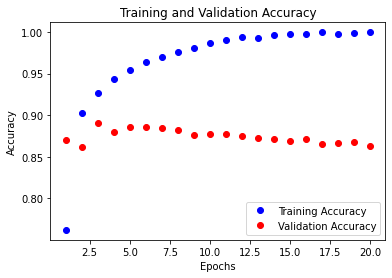

In [19]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 6. Train Model and Evaluate

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.5515 - accuracy: 0.7541
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2823 - accuracy: 0.9049
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2077 - accuracy: 0.9267
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2895 - accuracy: 0.8855


In [21]:
results

[0.2895169258117676, 0.8855199813842773]

In [ ]:
# 7. Predict

In [22]:
model.predict(x_test)

array([[0.2368283 ],
       [0.99985963],
       [0.93803847],
       ...,
       [0.12533179],
       [0.0741294 ],
       [0.57949746]], dtype=float32)

In [23]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)